<a href="https://colab.research.google.com/github/alejandradz98/PDI/blob/master/HISTOGRAMA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/PDI/'
os.chdir(path)

In [0]:
def displayGray3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(3,3))
  plt.subplot(131), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c,cmap='gray'), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayGray2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(131), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def readRGB(imgPath):
  img=cv2.imread(imgPath)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

## alto brillo equalizada

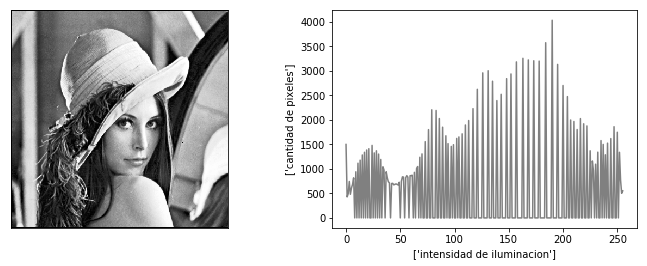

In [5]:
img = cv2.imread('lenaB.png', 0)
img = cv2.equalizeHist(img)

hist = cv2.calcHist([img],[0],None,[256],[0,256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()

poco brillo equalizada


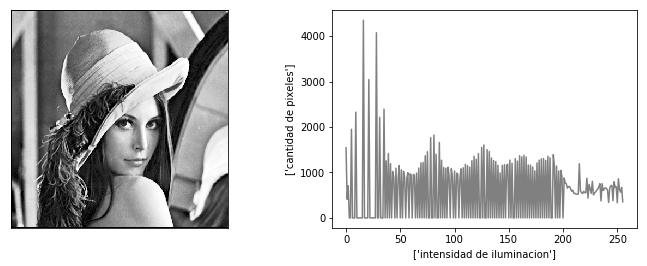

In [6]:
img = cv2.imread('lenaD.png', 0)
img = cv2.equalizeHist(img)

hist = cv2.calcHist([img],[0],None,[256],[0,256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()

# MASCARA


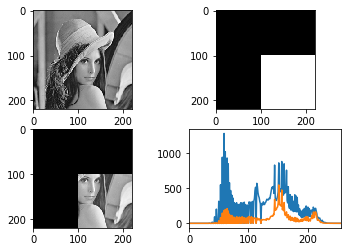

In [12]:
img = cv2.imread('lena.png', 0)

#CREARMASCARA
mask=np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400]=255
masked_img = cv2.bitwise_and(img,img,mask=mask)

#histograma con y sin mascara
hist_full = cv2.calcHist([img],[0], None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0], mask,[256],[0,256])


plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()


EJERCICIO

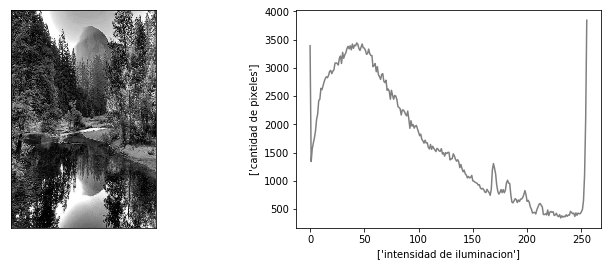

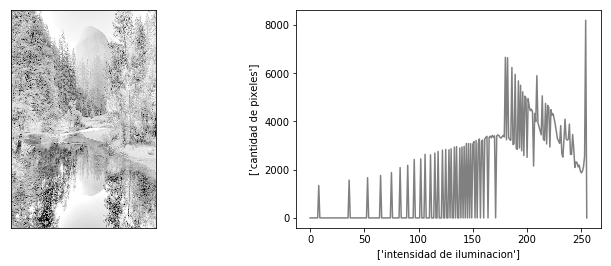

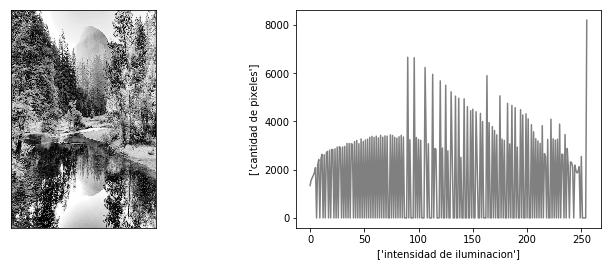

In [33]:
img1 = cv2.imread('imagen1.jpg', 0)


imgtrans1=(np.log(img1+0.2)/(np.log(1+np.max(img1))))*255
imgtrans1=(np.array(imgtrans1,dtype=np.uint8))

imgeq1 = cv2.equalizeHist(imgtrans1)

hist1 = cv2.calcHist([img1],[0],None,[256],[0,256])
hist2 = cv2.calcHist([imgtrans1],[0],None,[256],[0,256])
hist3 = cv2.calcHist([imgeq1],[0],None,[256],[0,256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img1,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist1,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(imgtrans1,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist2,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(imgeq1,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist3,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


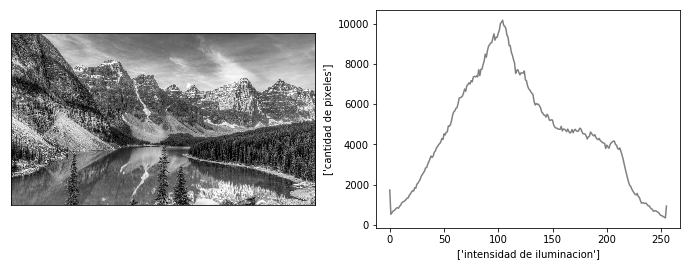

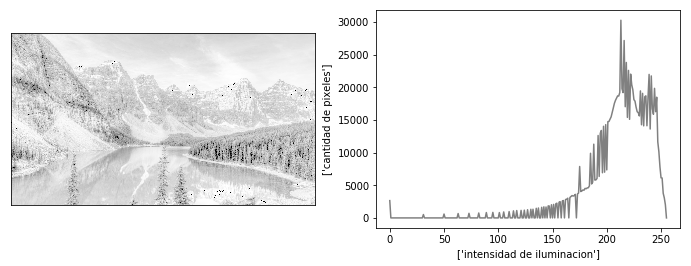

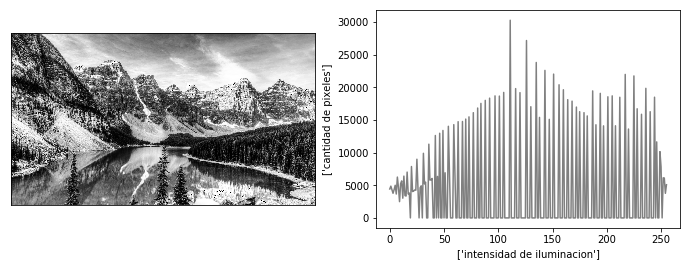

In [37]:
img2 = cv2.imread('imagen2.jpg', 0)


imgtrans2=(np.log(img2+1)/(np.log(1+np.max(img2))))*255
imgtrans2=(np.array(imgtrans2,dtype=np.uint8))

imgeq2 = cv2.equalizeHist(imgtrans2)

hist1 = cv2.calcHist([img2],[0],None,[256],[0,256])
hist2 = cv2.calcHist([imgtrans2],[0],None,[256],[0,256])
hist3 = cv2.calcHist([imgeq2],[0],None,[256],[0,256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img2,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist1,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(imgtrans2,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist2,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(imgeq2,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist3,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()


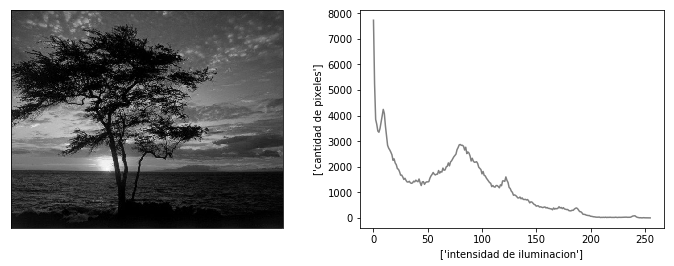

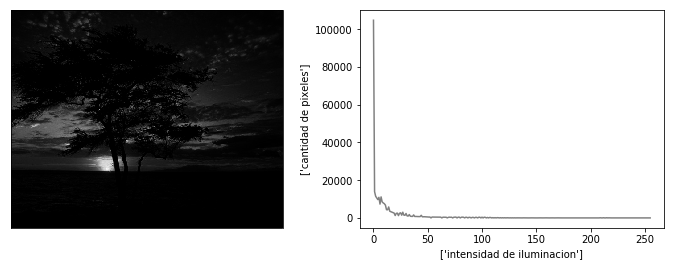

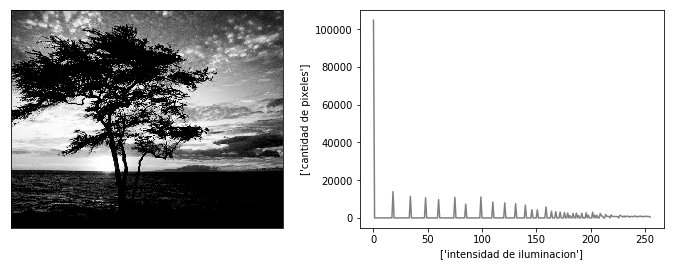

In [45]:
img3 = cv2.imread('imagen3.jpg', 0)

img3tt=np.array(255*((img3)/255)**3,dtype='uint8')

imgtrans3 = np.asarray(img3tt)
imgeq3 = cv2.equalizeHist(imgtrans3)

hist1 = cv2.calcHist([img3],[0],None,[256],[0,256])
hist2 = cv2.calcHist([imgtrans3],[0],None,[256],[0,256])
hist3 = cv2.calcHist([imgeq3],[0],None,[256],[0,256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img3,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist1,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(imgtrans3,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist2,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(imgeq3,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist3,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()



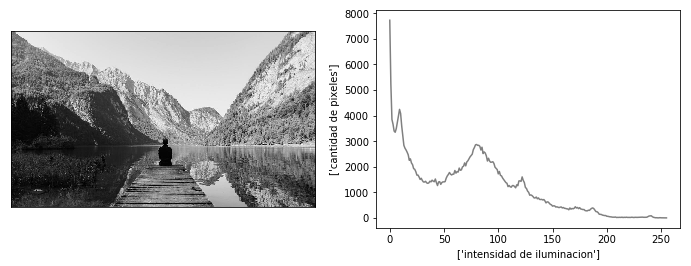

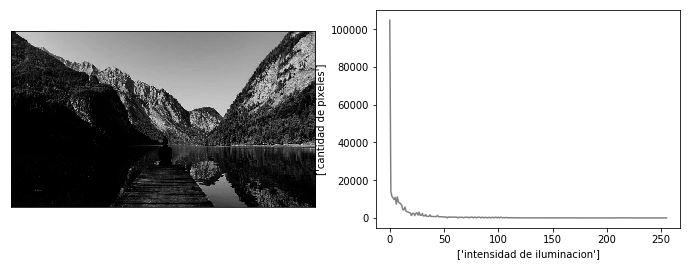

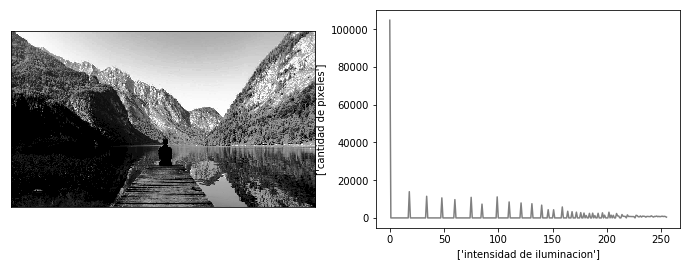

In [46]:
img4 = cv2.imread('imagen4.jpg', 0)

img4tt=np.array(255*((img4)/255)**3,dtype='uint8')

imgtrans4 = np.asarray(img4tt)
imgeq4 = cv2.equalizeHist(imgtrans4)

hist1 = cv2.calcHist([img3],[0],None,[256],[0,256])
hist2 = cv2.calcHist([imgtrans3],[0],None,[256],[0,256])
hist3 = cv2.calcHist([imgeq3],[0],None,[256],[0,256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img4,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist1,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(imgtrans4,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist2,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(imgeq4,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist3,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()

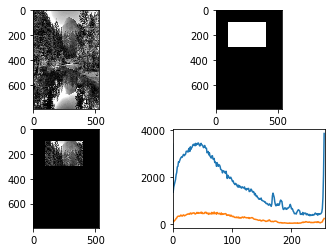

In [47]:
img = cv2.imread('imagen1.jpg', 0)

#CREARMASCARA
mask=np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400]=255
masked_img = cv2.bitwise_and(img,img,mask=mask)

#histograma con y sin mascara
hist_full = cv2.calcHist([img],[0], None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0], mask,[256],[0,256])


plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()


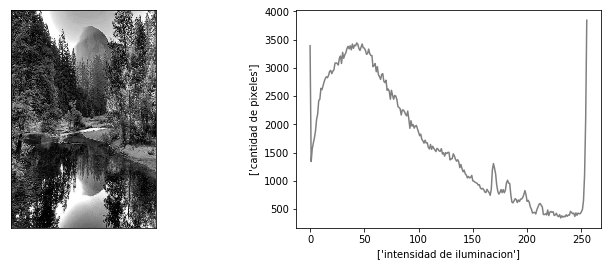

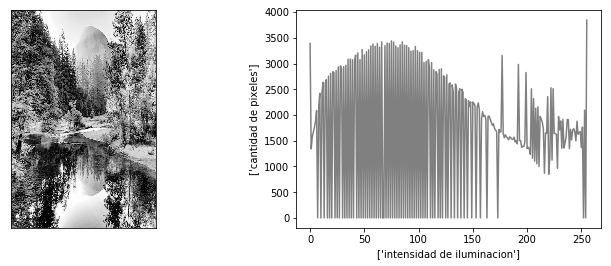

In [49]:
img4 = cv2.imread('imagen1.jpg', 0)
imgeq4 = cv2.equalizeHist(img4)

hist1 = cv2.calcHist([img4],[0],None,[256],[0,256])
hist2 = cv2.calcHist([imgeq4],[0],None,[256],[0,256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img4,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist1,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(imgeq4,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist2,color='gray')
plt.xlabel(['intensidad de iluminacion'])
plt.ylabel(['cantidad de pixeles'])
plt.show()